In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bike_sales_100k.csv')
df

,Sale_ID,Date,Customer_ID,Bike_Model,Price,Quantity,Store_Location,Salesperson_ID,Payment_Method,Customer_Age,Customer_Gender
0,1,11-07-2022,9390,Cruiser,318.32,1,Philadelphia,589,Apple Pay,70,Female
1,2,03-05-2024,3374,Hybrid Bike,3093.47,4,Chicago,390,Apple Pay,37,Male
2,3,01-09-2022,2689,Folding Bike,4247.99,3,San Antonio,338,PayPal,59,Female
3,4,28-09-2022,3797,Mountain Bike,1722.01,3,San Antonio,352,Apple Pay,19,Male
4,5,05-01-2021,1633,BMX,3941.44,3,Philadelphia,580,PayPal,67,Female
...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,16-06-2022,7584,Hybrid Bike,3088.13,2,Philadelphia,116,PayPal,60,Female
99996,99997,09-12-2023,9076,Road Bike,1051.44,2,Phoenix,153,Credit Card,67,Female
99997,99998,14-02-2020,3944,Folding Bike,2783.79,4,Phoenix,124,Google Pay,37,Female
99998,99999,13-12-2023,3334,Hybrid Bike,4265.42,4,Philadelphia,610,Credit Card,57,Male


In [3]:
print("\n=== Info Dataset ===")
print(df.info())

print("\n=== Missing Values ===")
print(df.isnull().sum())

print("\n=== Deskripsi Statistik Numerik ===")
print(df.describe())

print("\n=== Deskripsi Statistik Kategorikal ===")
print(df.describe(include=['object']))


=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Sale_ID          100000 non-null  int64  
 1   Date             100000 non-null  object 
 2   Customer_ID      100000 non-null  int64  
 3   Bike_Model       100000 non-null  object 
 4   Price            100000 non-null  float64
 5   Quantity         100000 non-null  int64  
 6   Store_Location   100000 non-null  object 
 7   Salesperson_ID   100000 non-null  int64  
 8   Payment_Method   100000 non-null  object 
 9   Customer_Age     100000 non-null  int64  
 10  Customer_Gender  100000 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 8.4+ MB
None

=== Missing Values ===
Sale_ID            0
Date               0
Customer_ID        0
Bike_Model         0
Price              0
Quantity           0
Store_Location     0
Salesperson_ID     

In [4]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

print("\nTanggal yang gagal diparse:")
print(df[df['Date'].isnull()])

df = df.dropna(subset=['Date'])

print("\nJumlah data duplikat:", df.duplicated().sum())



Tanggal yang gagal diparse:
Empty DataFrame
Columns: [Sale_ID, Date, Customer_ID, Bike_Model, Price, Quantity, Store_Location, Salesperson_ID, Payment_Method, Customer_Age, Customer_Gender]
Index: []

Jumlah data duplikat: 0


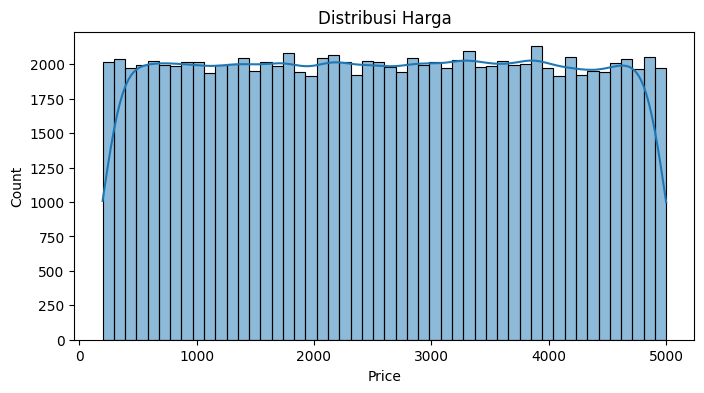

In [5]:
plt.figure(figsize=(8,4))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribusi Harga')
plt.show()

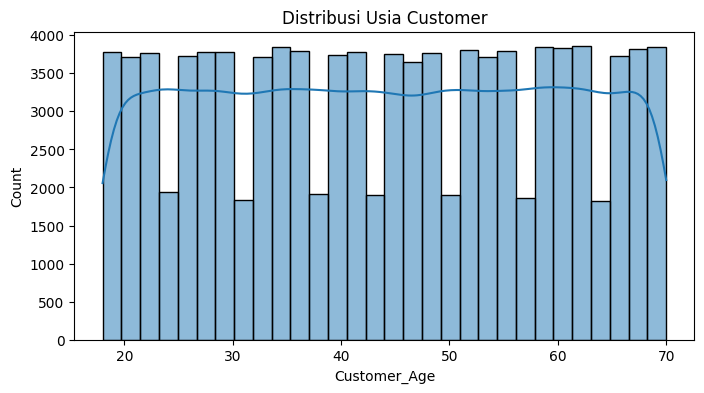

In [6]:
plt.figure(figsize=(8,4))
sns.histplot(df['Customer_Age'], bins=30, kde=True)
plt.title('Distribusi Usia Customer')
plt.show()

In [7]:
print("\nNilai unik Quantity:", df['Quantity'].unique())
print(df.groupby('Payment_Method')['Price'].sum().sort_values(ascending=False))


Nilai unik Quantity: [1 4 3 5 2]
Payment_Method
Apple Pay      43560175.14
Debit Card     43465152.78
Cash           43339432.71
Credit Card    43334315.29
Google Pay     43292139.57
PayPal         42827018.47
Name: Price, dtype: float64


In [8]:
print("\n=== Distribusi Harga ===")
print("Jumlah data  :", len(df['Price']))
print("Nilai minimum:", df['Price'].min())
print("Nilai maksimum:", df['Price'].max())
print("Rata-rata    :", df['Price'].mean())
print("Median       :", df['Price'].median())
print("Standar dev  :", df['Price'].std())
print("\nKuartil:")
print(df['Price'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

print("\n=== Distribusi Usia Customer ===")
print("Jumlah data  :", len(df['Customer_Age']))
print("Nilai minimum:", df['Customer_Age'].min())
print("Nilai maksimum:", df['Customer_Age'].max())
print("Rata-rata    :", df['Customer_Age'].mean())
print("Median       :", df['Customer_Age'].median())
print("Standar dev  :", df['Customer_Age'].std())
print("\nKuartil:")
print(df['Customer_Age'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))


=== Distribusi Harga ===
Jumlah data  : 100000
Nilai minimum: 200.01
Nilai maksimum: 4999.81
Rata-rata    : 2598.1823396000004
Median       : 2598.575
Standar dev  : 1384.943132758159

Kuartil:
0.25    1399.7875
0.50    2598.5750
0.75    3795.9825
0.90    4521.6910
0.95    4758.7870
0.99    4949.7300
Name: Price, dtype: float64

=== Distribusi Usia Customer ===
Jumlah data  : 100000
Nilai minimum: 18
Nilai maksimum: 70
Rata-rata    : 44.04341
Median       : 44.0
Standar dev  : 15.313760827589247

Kuartil:
0.25    31.0
0.50    44.0
0.75    57.0
0.90    65.0
0.95    68.0
0.99    70.0
Name: Customer_Age, dtype: float64


In [9]:
Q1_age = df['Customer_Age'].quantile(0.25)
Q3_age = df['Customer_Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
upper_bound_age = Q3_age + 1.5 * IQR_age
lower_bound_age = Q1_age - 1.5 * IQR_age

outliers_age = df[(df['Customer_Age'] > upper_bound_age) | (df['Customer_Age'] < lower_bound_age)]

print("\n=== Outliers Customer_Age ===")
print("Jumlah data:", len(df))
print("Jumlah outliers:", len(outliers_age))
print("Persentase outliers: {:.2f}%".format(100 * len(outliers_age) / len(df)))
print("Rentang wajar usia: {:.1f} - {:.1f}".format(lower_bound_age, upper_bound_age))
print("Nilai usia minimum:", df['Customer_Age'].min())
print("Nilai usia maksimum:", df['Customer_Age'].max())

Q1_qty = df['Quantity'].quantile(0.25)
Q3_qty = df['Quantity'].quantile(0.75)
IQR_qty = Q3_qty - Q1_qty
upper_bound_qty = Q3_qty + 1.5 * IQR_qty
lower_bound_qty = Q1_qty - 1.5 * IQR_qty

outliers_qty = df[(df['Quantity'] > upper_bound_qty) | (df['Quantity'] < lower_bound_qty)]

print("\n=== Outliers Quantity ===")
print("Jumlah data:", len(df))
print("Jumlah outliers:", len(outliers_qty))
print("Persentase outliers: {:.2f}%".format(100 * len(outliers_qty) / len(df)))
print("Rentang wajar Quantity: {:.1f} - {:.1f}".format(lower_bound_qty, upper_bound_qty))
print("Nilai Quantity minimum:", df['Quantity'].min())
print("Nilai Quantity maksimum:", df['Quantity'].max())


=== Outliers Customer_Age ===
Jumlah data: 100000
Jumlah outliers: 0
Persentase outliers: 0.00%
Rentang wajar usia: -8.0 - 96.0
Nilai usia minimum: 18
Nilai usia maksimum: 70

=== Outliers Quantity ===
Jumlah data: 100000
Jumlah outliers: 0
Persentase outliers: 0.00%
Rentang wajar Quantity: -1.0 - 7.0
Nilai Quantity minimum: 1
Nilai Quantity maksimum: 5


In [10]:
df_fe = df.copy()

In [11]:
df_fe['Date'] = pd.to_datetime(df_fe['Date'], dayfirst=True)

In [12]:
df_fe['Total_Amount'] = df_fe['Price'] * df_fe['Quantity']

In [13]:
df_fe['Age_Group'] = pd.cut(
    df_fe['Customer_Age'],
    bins=[17,25,35,45,55,65,75],
    labels=['18-25','26-35','36-45','46-55','56-65','66-75']
)

In [14]:
df_fe['Year'] = df_fe['Date'].dt.year
df_fe['Month'] = df_fe['Date'].dt.month
df_fe['Day_of_Week'] = df_fe['Date'].dt.dayofweek

In [15]:
df_fe['High_Price'] = (df_fe['Price'] > 4000).astype(int)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [18]:
num_cols = ['Price', 'Quantity', 'Customer_Age', 'Total_Amount']

scaler = StandardScaler()
X_num = scaler.fit_transform(df_fe[num_cols])

kmeans = KMeans(n_clusters=5, random_state=42)
df_fe['cluster_id'] = kmeans.fit_predict(X_num)

In [20]:
df_fe['price_bin'] = pd.qcut(df_fe['Price'], q=3, labels=['low','medium','high'])
df_fe['age_bin'] = pd.qcut(df_fe['Customer_Age'], q=3, labels=['young','middle','old'])

In [22]:
df_fe['Bike_Payment'] = df_fe['Bike_Model'] + "_" + df_fe['Payment_Method']
df_fe['Store_Month'] = df_fe['Store_Location'] + "_M" + df_fe['Month'].astype(str)

In [23]:
df_fe

,Sale_ID,Date,Customer_ID,Bike_Model,Price,Quantity,Store_Location,Salesperson_ID,Payment_Method,Customer_Age,...,Age_Group,Year,Month,Day_of_Week,High_Price,cluster_id,price_bin,age_bin,Bike_Payment,Store_Month
0,1,2022-07-11,9390,Cruiser,318.32,1,Philadelphia,589,Apple Pay,70,...,66-75,2022,7,0,0,1,low,old,Cruiser_Apple Pay,Philadelphia_M7
1,2,2024-05-03,3374,Hybrid Bike,3093.47,4,Chicago,390,Apple Pay,37,...,36-45,2024,5,4,0,2,medium,middle,Hybrid Bike_Apple Pay,Chicago_M5
2,3,2022-09-01,2689,Folding Bike,4247.99,3,San Antonio,338,PayPal,59,...,56-65,2022,9,3,1,0,high,old,Folding Bike_PayPal,San Antonio_M9
3,4,2022-09-28,3797,Mountain Bike,1722.01,3,San Antonio,352,Apple Pay,19,...,18-25,2022,9,2,0,3,low,young,Mountain Bike_Apple Pay,San Antonio_M9
4,5,2021-01-05,1633,BMX,3941.44,3,Philadelphia,580,PayPal,67,...,66-75,2021,1,1,0,0,high,old,BMX_PayPal,Philadelphia_M1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,2022-06-16,7584,Hybrid Bike,3088.13,2,Philadelphia,116,PayPal,60,...,56-65,2022,6,3,0,4,medium,old,Hybrid Bike_PayPal,Philadelphia_M6
99996,99997,2023-12-09,9076,Road Bike,1051.44,2,Phoenix,153,Credit Card,67,...,66-75,2023,12,5,0,1,low,old,Road Bike_Credit Card,Phoenix_M12
99997,99998,2020-02-14,3944,Folding Bike,2783.79,4,Phoenix,124,Google Pay,37,...,36-45,2020,2,4,0,2,medium,middle,Folding Bike_Google Pay,Phoenix_M2
99998,99999,2023-12-13,3334,Hybrid Bike,4265.42,4,Philadelphia,610,Credit Card,57,...,56-65,2023,12,2,1,0,high,old,Hybrid Bike_Credit Card,Philadelphia_M12


In [24]:
df_fe['Bike_Store'] = df_fe['Bike_Model'] + "_" + df_fe['Store_Location']
bike_freq = df_fe['Bike_Model'].value_counts(normalize=True)
df_fe['Bike_Model_freq'] = df_fe['Bike_Model'].map(bike_freq)
df_fe['Month_sin'] = np.sin(2 * np.pi * df_fe['Month']/12)
df_fe['Month_cos'] = np.cos(2 * np.pi * df_fe['Month']/12)
df_fe['Price_per_unit'] = df_fe['Price'] / df_fe['Quantity']

In [25]:
df_fe

,Sale_ID,Date,Customer_ID,Bike_Model,Price,Quantity,Store_Location,Salesperson_ID,Payment_Method,Customer_Age,...,cluster_id,price_bin,age_bin,Bike_Payment,Store_Month,Bike_Store,Bike_Model_freq,Month_sin,Month_cos,Price_per_unit
0,1,2022-07-11,9390,Cruiser,318.32,1,Philadelphia,589,Apple Pay,70,...,1,low,old,Cruiser_Apple Pay,Philadelphia_M7,Cruiser_Philadelphia,0.14332,-5.000000e-01,-8.660254e-01,318.320000
1,2,2024-05-03,3374,Hybrid Bike,3093.47,4,Chicago,390,Apple Pay,37,...,2,medium,middle,Hybrid Bike_Apple Pay,Chicago_M5,Hybrid Bike_Chicago,0.14319,5.000000e-01,-8.660254e-01,773.367500
2,3,2022-09-01,2689,Folding Bike,4247.99,3,San Antonio,338,PayPal,59,...,0,high,old,Folding Bike_PayPal,San Antonio_M9,Folding Bike_San Antonio,0.14329,-1.000000e+00,-1.836970e-16,1415.996667
3,4,2022-09-28,3797,Mountain Bike,1722.01,3,San Antonio,352,Apple Pay,19,...,3,low,young,Mountain Bike_Apple Pay,San Antonio_M9,Mountain Bike_San Antonio,0.14111,-1.000000e+00,-1.836970e-16,574.003333
4,5,2021-01-05,1633,BMX,3941.44,3,Philadelphia,580,PayPal,67,...,0,high,old,BMX_PayPal,Philadelphia_M1,BMX_Philadelphia,0.14377,5.000000e-01,8.660254e-01,1313.813333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,2022-06-16,7584,Hybrid Bike,3088.13,2,Philadelphia,116,PayPal,60,...,4,medium,old,Hybrid Bike_PayPal,Philadelphia_M6,Hybrid Bike_Philadelphia,0.14319,1.224647e-16,-1.000000e+00,1544.065000
99996,99997,2023-12-09,9076,Road Bike,1051.44,2,Phoenix,153,Credit Card,67,...,1,low,old,Road Bike_Credit Card,Phoenix_M12,Road Bike_Phoenix,0.14363,-2.449294e-16,1.000000e+00,525.720000
99997,99998,2020-02-14,3944,Folding Bike,2783.79,4,Phoenix,124,Google Pay,37,...,2,medium,middle,Folding Bike_Google Pay,Phoenix_M2,Folding Bike_Phoenix,0.14329,8.660254e-01,5.000000e-01,695.947500
99998,99999,2023-12-13,3334,Hybrid Bike,4265.42,4,Philadelphia,610,Credit Card,57,...,0,high,old,Hybrid Bike_Credit Card,Philadelphia_M12,Hybrid Bike_Philadelphia,0.14319,-2.449294e-16,1.000000e+00,1066.355000


In [33]:
cols_to_drop = [
    'Sale_ID', 
    'Customer_ID', 
    'Salesperson_ID', 
    'Date', 
    'Customer_Age',
    'Bike_Model',       
    'Price',             
    'Quantity',         
    'Store_Location',   
    'Payment_Method',  
    'Customer_Age',     
    'Total_Amount',
    'Age_Group',     
    'Year',
    'Month',
    'Day_of_Week',
    'High_Price'  
]
df_fe_clean = df_fe.drop(columns=cols_to_drop)


In [28]:
pd.set_option('display.max_columns', None)

In [34]:
df_fe_clean

,Customer_Gender,cluster_id,price_bin,age_bin,Bike_Payment,Store_Month,Bike_Store,Bike_Model_freq,Month_sin,Month_cos,Price_per_unit
0,Female,1,low,old,Cruiser_Apple Pay,Philadelphia_M7,Cruiser_Philadelphia,0.14332,-5.000000e-01,-8.660254e-01,318.320000
1,Male,2,medium,middle,Hybrid Bike_Apple Pay,Chicago_M5,Hybrid Bike_Chicago,0.14319,5.000000e-01,-8.660254e-01,773.367500
2,Female,0,high,old,Folding Bike_PayPal,San Antonio_M9,Folding Bike_San Antonio,0.14329,-1.000000e+00,-1.836970e-16,1415.996667
3,Male,3,low,young,Mountain Bike_Apple Pay,San Antonio_M9,Mountain Bike_San Antonio,0.14111,-1.000000e+00,-1.836970e-16,574.003333
4,Female,0,high,old,BMX_PayPal,Philadelphia_M1,BMX_Philadelphia,0.14377,5.000000e-01,8.660254e-01,1313.813333
...,...,...,...,...,...,...,...,...,...,...,...
99995,Female,4,medium,old,Hybrid Bike_PayPal,Philadelphia_M6,Hybrid Bike_Philadelphia,0.14319,1.224647e-16,-1.000000e+00,1544.065000
99996,Female,1,low,old,Road Bike_Credit Card,Phoenix_M12,Road Bike_Phoenix,0.14363,-2.449294e-16,1.000000e+00,525.720000
99997,Female,2,medium,middle,Folding Bike_Google Pay,Phoenix_M2,Folding Bike_Phoenix,0.14329,8.660254e-01,5.000000e-01,695.947500
99998,Male,0,high,old,Hybrid Bike_Credit Card,Philadelphia_M12,Hybrid Bike_Philadelphia,0.14319,-2.449294e-16,1.000000e+00,1066.355000


In [35]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [36]:
class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.freq_maps = {}

    def fit(self, X, y=None):
        for col in self.columns:
            freqs = X[col].value_counts(normalize=True)
            self.freq_maps[col] = freqs
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in self.columns:
            X_copy[col + '_freq'] = X_copy[col].map(self.freq_maps[col]).fillna(0)
        return X_copy

In [37]:
class KMeansClusterer(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=5, features=None):
        self.n_clusters = n_clusters
        self.features = features
        self.kmeans = None

    def fit(self, X, y=None):
        self.kmeans = KMeans(n_clusters=self.n_clusters, random_state=42)
        self.kmeans.fit(X[self.features])
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy['cluster_id'] = self.kmeans.predict(X[self.features])
        return X_copy

In [38]:
feature_cols = [c for c in df_fe_clean.columns if c != 'Customer_Gender']
X = df_fe_clean[feature_cols]
y = df_fe_clean['Customer_Gender']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [46]:
num_features = ['Price_per_unit', 'Month_sin', 'Month_cos', 'Bike_Model_freq'] 
cat_features = ['price_bin', 'age_bin', 'Bike_Payment', 'Store_Month', 'Bike_Store']

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [57]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features + ['cluster_id'])
])

rf = RandomForestClassifier(n_estimators=200, random_state=42)
xgb = XGBClassifier(n_estimators=200, random_state=42, use_label_encoder=False, eval_metric='logloss')

ensemble = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb)],
    voting='soft'
)

In [63]:
full_pipeline = Pipeline([
    ('cluster', KMeansClusterer(
        n_clusters=5,
        features=['Price_per_unit', 'Month_sin', 'Month_cos', 'Bike_Model_freq']
    )),
    ('preprocessor', preprocessor),
    ('clf', ensemble)
])

In [64]:
full_pipeline

Pipeline(steps=[('cluster',
                 KMeansClusterer(features=['Price_per_unit', 'Month_sin',
                                           'Month_cos', 'Bike_Model_freq'])),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Price_per_unit',
                                                   'Month_sin', 'Month_cos',
                                                   'Bike_Model_freq']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['price_bin', 'age_bin',
                                                   'Bike_Payment',
                                                   'Store_Month', 'Bi...
                                                             grow_policy=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=200,
                                                             n_jobs=None,
                                                             num_parallel_tree=None, ...))],
                                  voting='soft'))])

In [65]:
param_grid = {
    'clf__rf__n_estimators': [100, 200],
    'clf__xgb__learning_rate': [0.05, 0.1],
    'clf__xgb__max_depth': [3, 5]
}

grid = GridSearchCV(
    full_pipeline,
    param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

In [66]:
grid

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('cluster',
                                        KMeansClusterer(features=['Price_per_unit',
                                                                  'Month_sin',
                                                                  'Month_cos',
                                                                  'Bike_Model_freq'])),
                                       ('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Price_per_unit',
                                                                          'Month_sin',
                                                                          'Month_cos',
                                                                          'Bike_Model_freq']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['price_bin',
                                                                          'age_bin',
                                                                          'Bik...
                                                                                    max_delta_step=None,
                                                                                    max_depth=None,
                                                                                    max_leaves=None,
                                                                                    min_child_weight=None,
                                                                                    missing=nan,
                                                                                    monotone_constraints=None,
                                                                                    multi_strategy=None,
                                                                                    n_estimators=200,
                                                                                    n_jobs=None,
                                                                                    num_parallel_tree=None, ...))],
                                                         voting='soft'))]),
             n_jobs=-1,
             param_grid={'clf__rf__n_estimators': [100, 200],
                         'clf__xgb__learning_rate': [0.05, 0.1],
                         'clf__xgb__max_depth': [3, 5]},
             scoring='accuracy', verbose=2)

In [67]:
grid.fit(X_train, y_train)

print("\n✅ Best params:", grid.best_params_)
print("✅ Best score:", grid.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:38:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ Best params: {'clf__rf__n_estimators': 200, 'clf__xgb__learning_rate': 0.1, 'clf__xgb__max_depth': 5}
✅ Best score: 0.4957875395304277


In [68]:
from sklearn.metrics import accuracy_score, classification_report

In [71]:
y_pred = grid.predict(X_test)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


✅ Accuracy: 0.49685
              precision    recall  f1-score   support

      Female       0.50      0.51      0.50     10045
        Male       0.49      0.49      0.49      9955

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

